In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM


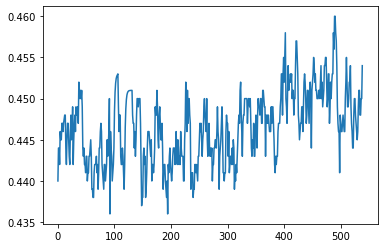

In [ ]:
df=pd.read_csv('cell_7_1.csv')
df=df['ResistValue']
df.plot()

In [ ]:
def error_rate(original, prediction, ft_len, forecast_len):
    error_avg = []
    ft_len = ft_len-1
    for i in range(forecast_len):
      error = abs((original[ft_len+i] - prediction[-forecast_len+i]))/original[ft_len+i] * 100
      print('num',i,error,'actual',original[ft_len+i],'prediction',predictions[-forecast_len+i])
      print("오차율 :",error)
      error_avg.append(error)
    print('최소 오류값 :',min(error_avg))
    print('최대 오류값 :',max(error_avg))
    return sum(error_avg)/len(error_avg)

def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P
# Initialization for system model.
A = 1
H = 1
Q = 0.0001
R = 0.001
# Initialization for estimation.
x_0 = 10  # 14 for book.
P_0 = 6

def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - (window_size+20)):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size+window_size-1]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
n_samples = len(df)
x_0 = df[1]
r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = df[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

df = r_esti_save

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['ResistValue']
df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

train=df_scaled
feature_cols = ['ResistValue']
label_cols = ['ResistValue']

train_feature = train[feature_cols]
train_label = train[label_cols]
# test_feature = test[feature_cols]
# test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)
total_len = len(train_feature)

x_train = train_feature[:int(total_len*0.8)]
x_valid = train_feature[int(total_len*0.8):]
y_train = train_label[:int(total_len*0.8)]
y_valid = train_label[int(total_len*0.8):]

model= Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu'))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.summary()

from keras.callbacks import EarlyStopping
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
early_stop=EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, epochs=100, batch_size=1)
model.save('testmodel.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 76,929
Trainable params: 76,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
399/399 [==============================] - 26s 7ms/step - loss: 0.0438 - mse: 0.0438
Epoch 2/100
399/399 [==============================] - 3s 7ms/step - loss: 0.0382 - mse: 0.0382
Epoch 3/100
399/399 [==============================] - 3s

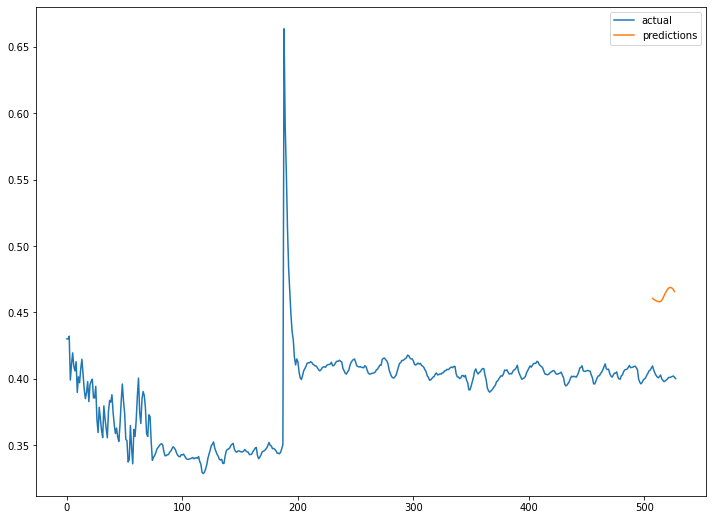

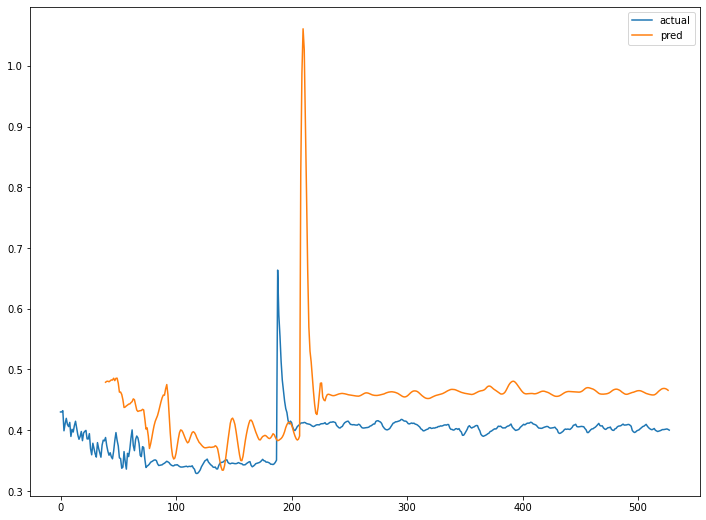

num 0 [11.98909517] actual [0.41121161] prediction [0.46051216]
오차율 : [11.98909517]
num 1 [12.81428987] actual [0.40764241] prediction [0.4598789]
오차율 : [12.81428987]
num 2 [12.87109078] actual [0.40692855] prediction [0.4593047]
오차율 : [12.87109078]
num 3 [12.66713266] actual [0.40721801] prediction [0.45880085]
오차율 : [12.66713266]
num 4 [13.48234909] actual [0.40391724] prediction [0.45837477]
오차율 : [13.48234909]
num 5 [13.93164525] actual [0.4020485] prediction [0.45806047]
오차율 : [13.93164525]
num 6 [14.14507234] actual [0.40122493] prediction [0.4579785]
오차율 : [14.14507234]
num 7 [13.75900636] actual [0.4027851] prediction [0.45820433]
오차율 : [13.75900636]
num 8 [13.58638334] actual [0.40419394] prediction [0.45910928]
오차율 : [13.58638334]
num 9 [13.97024068] actual [0.40414154] prediction [0.4606011]
오차율 : [13.97024068]
num 10 [14.1507462] actual [0.40518393] prediction [0.46252048]
오차율 : [14.1507462]
num 11 [15.70593148] actual [0.40135205] prediction [0.46438813]
오차율 : [15.70593148

In [ ]:
df=pd.read_csv('m2_s2_bank_fc3d2b581285134ea7b13a850adfc373__site_1239fca6caf920448b3cd13f6a2997af.csv')
df=df[df['CellNo']==60].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, 20)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[39:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)

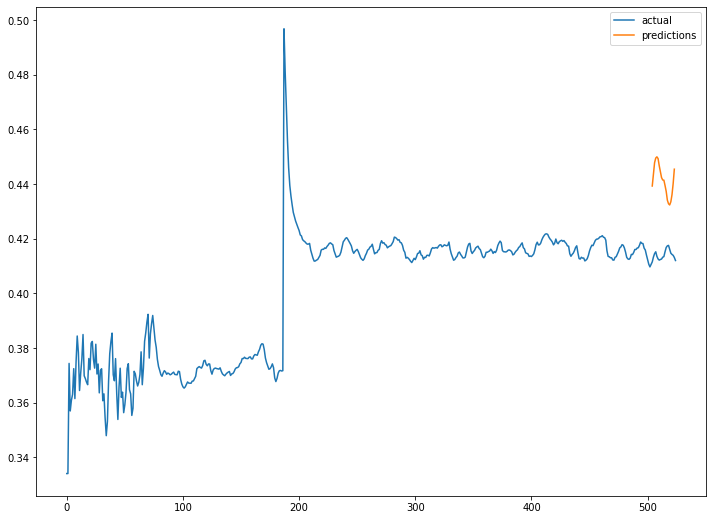

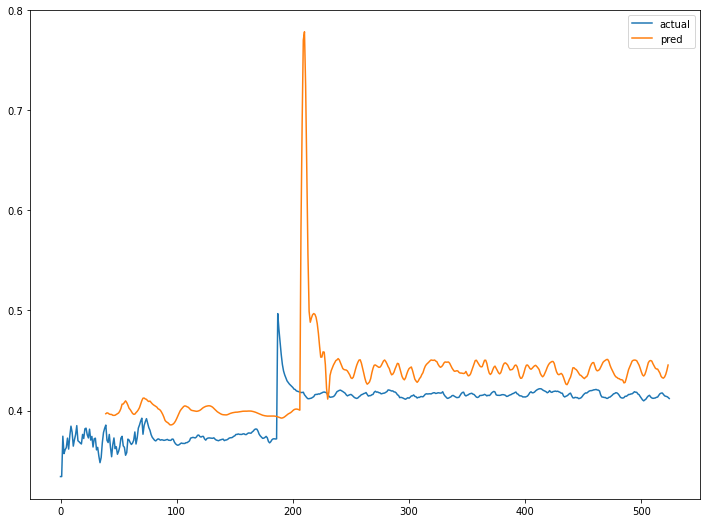

num 0 [4.49479167] actual [0.42038428] prediction [0.43927968]
오차율 : [4.49479167]
num 1 [5.74114499] actual [0.41946999] prediction [0.44355237]
오차율 : [5.74114499]
num 2 [7.76359986] actual [0.41556084] prediction [0.44782332]
오차율 : [7.76359986]
num 3 [8.70360772] actual [0.41351823] prediction [0.44950923]
오차율 : [8.70360772]
num 4 [8.84939433] actual [0.41337823] prediction [0.4499597]
오차율 : [8.84939433]
num 5 [8.79679099] actual [0.41300589] prediction [0.44933715]
오차율 : [8.79679099]
num 6 [8.16428179] actual [0.4130043] prediction [0.44672313]
오차율 : [8.16428179]
num 7 [7.846502] actual [0.41219267] prediction [0.44453537]
오차율 : [7.846502]
num 8 [7.33228053] actual [0.41214062] prediction [0.44235992]
오차율 : [7.33228053]
num 9 [6.8489378] actual [0.41318325] prediction [0.44148192]
오차율 : [6.8489378]
num 10 [6.7758541] actual [0.4134039] prediction [0.44141555]
오차율 : [6.7758541]
num 11 [6.05613121] actual [0.41437541] prediction [0.43947053]
오차율 : [6.05613121]
num 12 [5.28776923] actua

In [ ]:
df=pd.read_csv('m2_s2_bank_fc3d2b581285134ea7b13a850adfc373__site_1239fca6caf920448b3cd13f6a2997af.csv')
df=df[df['CellNo']==78].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
forecasting=20
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[39:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)

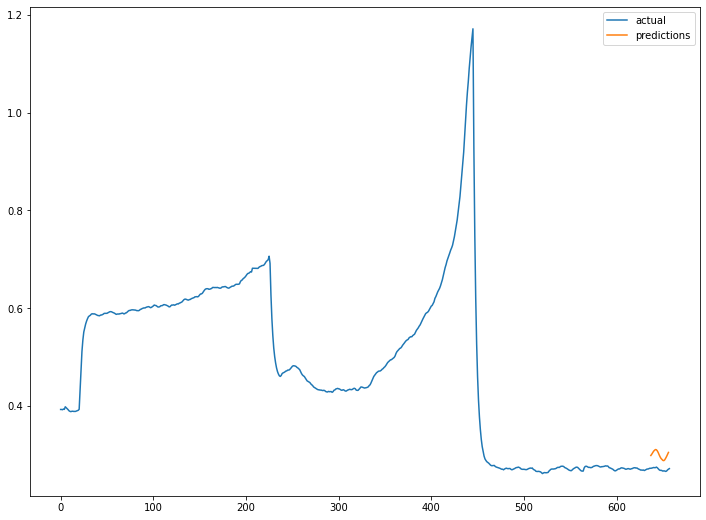

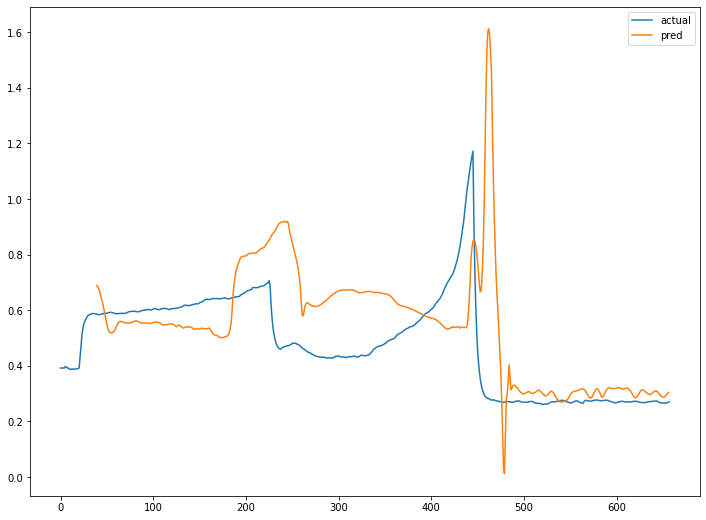

num 0 [10.45979099] actual [0.26958372] prediction [0.29778162]
오차율 : [10.45979099]
num 1 [12.17452205] actual [0.26780509] prediction [0.30040908]
오차율 : [12.17452205]
num 2 [13.87461673] actual [0.26650696] prediction [0.30348378]
오차율 : [13.87461673]
num 3 [15.07892973] actual [0.26637] prediction [0.30653575]
오차율 : [15.07892973]
num 4 [15.25200203] actual [0.26762083] prediction [0.30843836]
오차율 : [15.25200203]
num 5 [15.32034779] actual [0.26880389] prediction [0.30998558]
오차율 : [15.32034779]
num 6 [14.55222962] actual [0.27020765] prediction [0.3095289]
오차율 : [14.55222962]
num 7 [13.70329857] actual [0.27015155] prediction [0.30717123]
오차율 : [13.70329857]
num 8 [11.9540757] actual [0.27119123] prediction [0.30360964]
오차율 : [11.9540757]
num 9 [9.75189497] actual [0.27249035] prediction [0.29906332]
오차율 : [9.75189497]
num 10 [8.33050137] actual [0.27235788] prediction [0.29504666]
오차율 : [8.33050137]
num 11 [7.26613457] actual [0.27199104] prediction [0.29175428]
오차율 : [7.26613457]
nu

In [ ]:
df=pd.read_csv('m2_s2_bank_0765f177a52e5543a9e0a8bfc045cf6a__site_40ab7c891c559b478e96f8bb5c682ca0.csv')
df=df[df['CellNo']==20].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, 20)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len-39:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[39:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)

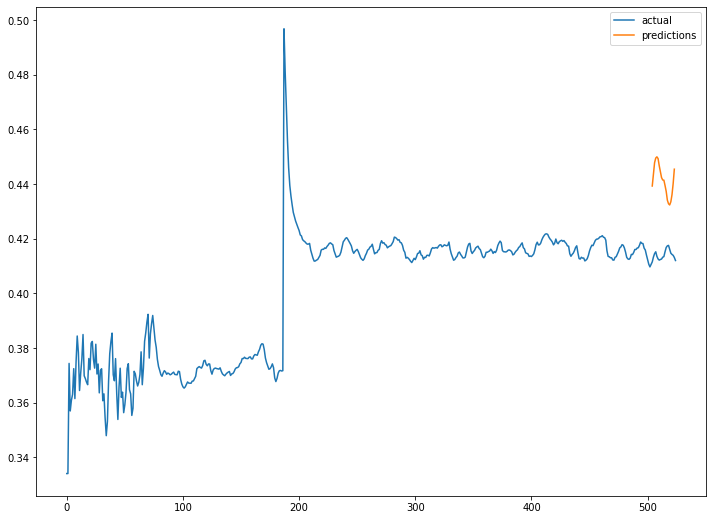

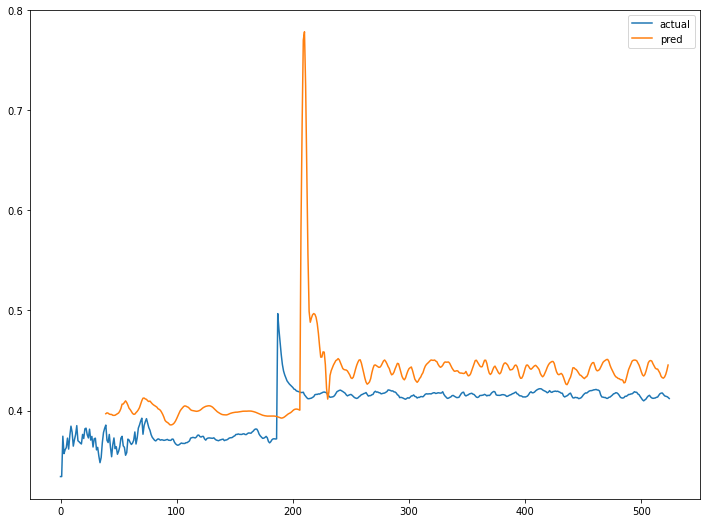

num 0 [4.49479167] actual [0.42038428] prediction [0.43927968]
오차율 : [4.49479167]
num 1 [5.74114499] actual [0.41946999] prediction [0.44355237]
오차율 : [5.74114499]
num 2 [7.76359986] actual [0.41556084] prediction [0.44782332]
오차율 : [7.76359986]
num 3 [8.70360772] actual [0.41351823] prediction [0.44950923]
오차율 : [8.70360772]
num 4 [8.84939433] actual [0.41337823] prediction [0.4499597]
오차율 : [8.84939433]
num 5 [8.79679099] actual [0.41300589] prediction [0.44933715]
오차율 : [8.79679099]
num 6 [8.16428179] actual [0.4130043] prediction [0.44672313]
오차율 : [8.16428179]
num 7 [7.846502] actual [0.41219267] prediction [0.44453537]
오차율 : [7.846502]
num 8 [7.33228053] actual [0.41214062] prediction [0.44235992]
오차율 : [7.33228053]
num 9 [6.8489378] actual [0.41318325] prediction [0.44148192]
오차율 : [6.8489378]
num 10 [6.7758541] actual [0.4134039] prediction [0.44141555]
오차율 : [6.7758541]
num 11 [6.05613121] actual [0.41437541] prediction [0.43947053]
오차율 : [6.05613121]
num 12 [5.28776923] actua

In [ ]:
forecasting=20

df=pd.read_csv('m2_s2_bank_fc3d2b581285134ea7b13a850adfc373__site_1239fca6caf920448b3cd13f6a2997af.csv')
df=df[df['CellNo']==78].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[forecasting+19:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)